Trabajo Final: Natalia Corredor y Felipe Rojas.
Para el trabajo final se implementarán los siguientes temas: Ajustes de distribución de probabilidad y optimización.

Descripción del problema: Un inversionista extranjero llega a Colombia y se plantea posibilidades de inversión en diferentes activos. Finalmente, después de muchas alternativas, llegó a las dos mejores opciones de inversión: Bonos soberanos cero cupón y Certificados de Deposito a Término (CDT), estos también son emitidos por el Estado.

Para poder asesorar a este inversionista y darle la mejor alternativa de inversión se deben tomar en cuenta las series historicas de las tasas de estos dos activos para poder obtener los parámetros y así realizar una optimización adecuada al problema planteado.


Lo primero que se realizó fue tomar las series históricas de las tasas de Bonos y CDTs, estas series cumplen con las siguientes condiciones: 

a) Las tasas en ambas series están a un año de rendimiento. 
b) Ambas series están en un mismo rango de tiempo (el primer dato registrado del 2005 hasta el último dato del mes de abril de 2022)
c) La periodicidad de ambas series se encuentra semanal. 
d) Ambas series están organizadas temporalmente; es decir, del dato más antiguo, al más reciente.

Lo primero que se hace es traer las series de datos historicos (ya organizados) desde el GitHub, la primera serie es la de las tasas cero cupón de los bonos soberanos 

In [65]:
import scipy
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.optimize import minimize
from scipy.optimize import linprog

In [66]:
 !wget https://raw.githubusercontent.com/Sierraleona1472/tasas-de-bonos-cero-cupon-1-/main/tasa%20de%20cero%20cupon%20(1).csv

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget https://raw.githubusercontent.com/Sierraleona1472/tasas-de-bonos-cero-cupon-1-/main/tasa%20de%20cero%20cupon%20(1).csv'


In [67]:
Y = pd.read_csv('https://raw.githubusercontent.com/Sierraleona1472/tasas-de-bonos-cero-cupon-1-/main/tasa%20de%20cero%20cupon%20(1).csv',sep=';')
Y = pd.DataFrame(Y).dropna()
Y

,tasa de bonos cero cupón a 1 año
0,0.084524
1,0.081262
2,0.079882
3,0.078470
4,0.075543
...,...
898,0.082787
899,0.073712
900,0.074246
901,0.077937


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1df5a290>]],
      dtype=object)

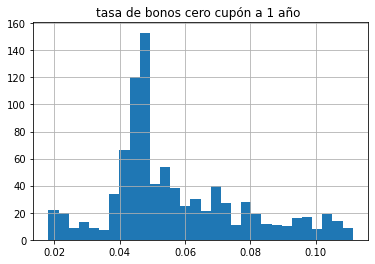

In [68]:
Y.hist(bins=30)

Aqui se muestra la forma de la distribución de los datos de la serie, y posteriormente se procede a encontrar la función de distribución ideal para la serie de datos junto con sus parámetros 

In [69]:
Y.describe()

,tasa de bonos cero cupón a 1 año
count,903.000000
mean,0.056863
std,0.020575
min,0.018242
25%,0.044374
50%,0.049159
75%,0.068950
max,0.111299


,sumsquare_error,aic,bic,kl_div
cauchy,6246.806156,-312.842505,1760.106493,inf
lognorm,8840.680341,-401.527531,2080.518262,inf
chi2,9054.605803,-404.889068,2102.108741,inf
gamma,9054.607338,-404.889035,2102.108894,inf
rayleigh,9770.934644,-418.420160,2164.056146,inf


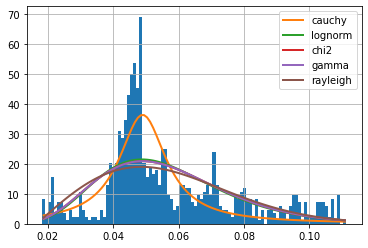

In [70]:
TasasBonos = Fitter(Y,distributions= get_common_distributions())
TasasBonos.fit()
TasasBonos.summary()

In [71]:
TasasBonos.fitted_param['cauchy']

(0.04899379434463249, 0.008763177710326166)

Dado el resultado anterior, la mejor distribución para usar es la distribución cauchy; sin embargo para efectos de la optimización se usarán los parámetros de la función de distribución normal.  

In [72]:
TasasBonos.fitted_param['norm']

(0.056863061646036196, 0.02056349327657187)

Lo segundo que se hace es traer la serie de datos históricos (ya organizados) desde el GitHub, ya que, la primera serie fue la de los datos de los bonos soberanos, ahora se traerá la serie de las tasas de los CDTs

In [73]:
 !wget https://raw.githubusercontent.com/Sierraleona1472/Tasas-de-CDTs/main/CDT%20a%20360%20d%C3%ADas.csv

--2022-05-17 00:35:14--  https://raw.githubusercontent.com/Sierraleona1472/Tasas-de-CDTs/main/CDT%20a%20360%20d%C3%ADas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7139 (7.0K) [text/plain]
Saving to: ‘CDT a 360 días.csv.4’

CDT a 360 días.csv. 100%[===================>]   6.97K  --.-KB/s    in 0s      

2022-05-17 00:35:14 (56.9 MB/s) - ‘CDT a 360 días.csv.4’ saved [7139/7139]



In [74]:
X = pd.read_csv('https://raw.githubusercontent.com/Sierraleona1472/Tasas-de-CDTs/main/CDT%20a%20360%20d%C3%ADas.csv',sep=';')
X = pd.DataFrame(X).dropna()
X

,CDT a 360 días
0,0.0890
1,0.0861
2,0.0844
3,0.0896
4,0.0845
...,...
896,0.0652
897,0.0660
898,0.0743
899,0.0774


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed29227a50>]],
      dtype=object)

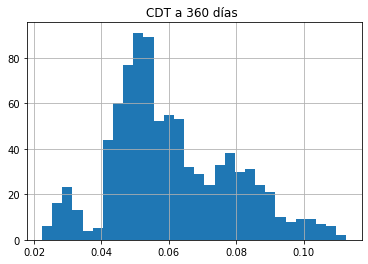

In [75]:
X.hist(bins=30)

Aqui se muestra la forma de la distribución de los datos de la serie, y posteriormente se procede a encontrar la función de distribución ideal para la serie de datos junto con sus parámetros 

In [76]:
X.describe()

,CDT a 360 días
count,901.000000
mean,0.060729
std,0.017976
min,0.022400
25%,0.048500
50%,0.056600
75%,0.073800
max,0.112600


,sumsquare_error,aic,bic,kl_div
lognorm,3930.947611,-395.933173,1347.701133,inf
gamma,3972.622791,-397.093705,1357.203088,inf
chi2,3972.624584,-397.093798,1357.203494,inf
cauchy,4228.734415,-341.634082,1406.690663,inf
rayleigh,4640.182713,-418.391583,1490.349402,inf


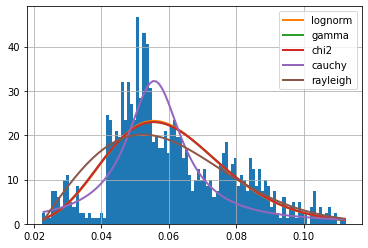

In [77]:
Tasascdt = Fitter(X,distributions= get_common_distributions())
Tasascdt.fit()
Tasascdt.summary()

In [78]:
Tasascdt.fitted_param['lognorm']

(0.19938117298681743, -0.028837668647283113, 0.08780469329595908)

Dado el resultado anterior, la mejor distribución para usar, es la distribución lognorm; sin embargo para efectos de la optimización se usarán los parámetros de la función de distribución normal.  

In [79]:
Tasascdt.fitted_param['norm']

(0.06072874583795782, 0.017965774141167713)

En este caso, se buscará asignar un capital de 100 USD en dos diferentes activos (CDT y bonos cero cupón). Para asignar este capital se buscará hacerlo en un plazo de 3 años con retiros de 20 USD al final de cada año.

Asimismo, el inversionista busca un perfil de riesgo específico, para este caso se siguieron las calificaciones otorgadas por Moody´s para ambos activos: Al CDT se le asigna una calificación de riesgo de 1 y  al bono cero cupón de 1.9, para este ejercicio el inversionista busca un riesgo total de 178 (esta cifra esta multiplicada por 100 para que pueda estar acorde con las demás cifras de las restricciones)

El CDT brinda una rentabilidad esperada de 1.06% anual, el bono cero cupón brinda una rentabilidad esperada de 1.056% anual.

X1 representa el valor puesto en el primer año en el bono cero cupón.

X2 representa el valor puesto en el primer año en el CDT.

Al comienzo del primer año se elige cuánto invertir en  X1 y en  X2:  X1 + X2 = 100 

Al comienzo del segundo año el inversionista tiene un saldo de X1 multiplicado por 1.056% y X2 multiplicado por 1.06%

Entonces: X1 multiplicado por 1.056% + X2 multiplicado por 1.06% - 20 = X3

Despejando: X3 -X1 multiplicado por 1.056% - X2 multiplicado por 1.06% = -20

Al comienzo del año 3 puede optar por:  X3 - X1 multiplicado por 1.056% - X2 multiplicado por 1.06% + 20 = X4

Despejando:  X4 -X3 + X1 multiplicado por 1.056% + X2 multiplicado por1 .06% = 20 

Finalmente, al final del año 3 se tendrá la función objetivo: 
 X4 + X1 multiplicado por 1.056% + X2 multiplicado por 1.06% = 0

Para asignar la inversión con respecto al riesgo, se espera que sea igual a 1,78. Por ende se  obtiene la siguiente restricción: 1.9X1 + X2 = 178

Función objetivo: X4 + X1 multiplicado por 1.056% + X2 multiplicado por 1.06% = 0 

Restricciones:  X1 + X2 = 100

X3 -X1 multiplicado por 1.056% - X2 multiplicado por 1.06% = -20   Comienzo del año 2

X4 -X3 + X1 multiplicado por 1.056% + X2 multiplicado por 1.06% = 20 Comienzo del año 3 

1.9X1 + X2 = 178


In [80]:
# Objective function parameters
c2 = np.array([1.056, 1.06,0, 1])

# Restricciones de desigualdad
A2 = np.array([[1,  1, 0, 0],
                  [-1.056,-1.06, 1, 0],
                  [-1.056, -1.06, -1, 1],
                  [1.9, 1, 0, 0]])
b2 = np.array([100, -20, -20, 178])

# Solve the problem:
res2 = linprog(-c2, A_eq=A2, b_eq=b2, method='revised simplex') # O interior-point
res2

     con: array([ 0.00000000e+00, -3.55271368e-15,  0.00000000e+00,  0.00000000e+00])
     fun: -276.96000000000004
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 86.66666667,  13.33333333,  85.65333333, 171.30666667])

Una vez realizada la optimización se obtienen los pesos óptimos en la asignación de la inversión inicial: El inversionista debe asignar el 86,66% de su inversión en el bono cero cupón, y el restante 13,33% se debe asignar al CDT. 
Es así como mediante al método de optimización se puede encontrar la mejor combinación posible para que el inversionista maximice su beneficio.
